<a href="https://colab.research.google.com/github/thachthaolee/DonneesConnectees/blob/main/Car_price_prediction_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Get the data

In [ ]:
file_path = '/content/gdrive/MyDrive/M2MIASHS/Mémoire S3/train.csv'
df = pd.read_csv(file_path)

## Take a quick look at the data structure

In [ ]:
df.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


Note: the unit of running column is not the same -> need to hadle into the same unit inorder to transfer the column into type of numerical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


No missing value in all the dataset

In [ ]:
df.describe()

,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


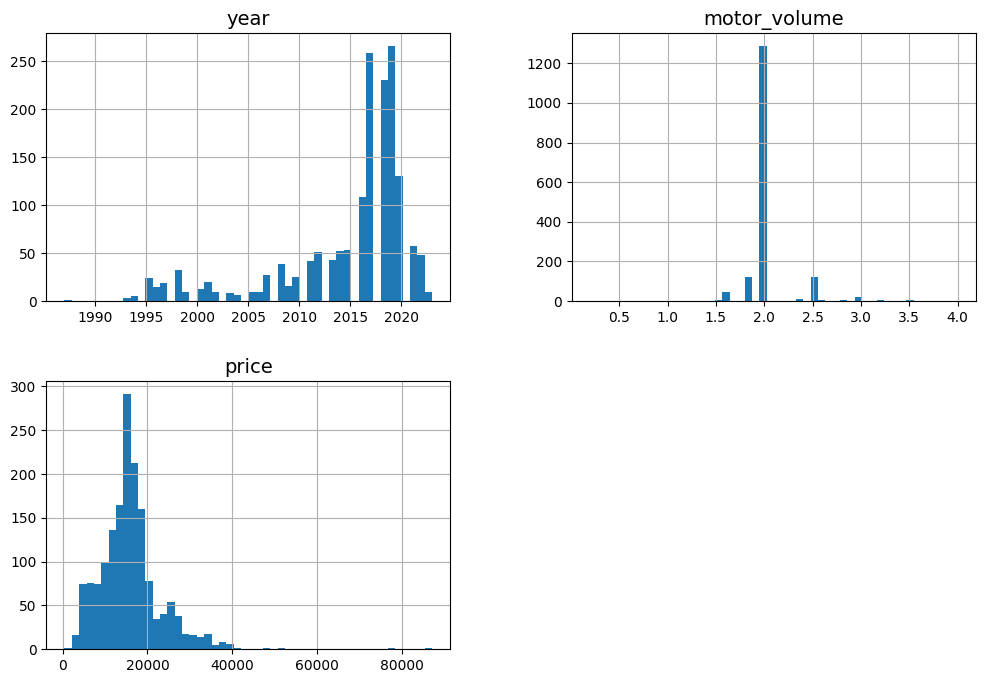

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

Histogram of price seem normal distribution if we apply some calculate

In [ ]:
df.describe(include='O')

,model,motor_type,running,wheel,color,type,status
count,1642,1642,1642,1642,1642,1642,1642
unique,5,5,643,1,17,7,5
top,mercedes-benz,petrol,300000 km,left,black,sedan,excellent
freq,402,1420,19,1642,541,1276,1200


Change the unit of running column.

Wheel column has only 1 unique value. So can we remove this column??

Do we need create more variable to the model? such as running per motor or running per year?

Add comumn of age which is caculated from year_now - df.year

In [ ]:
#Check the duplicated data

df.loc[df.duplicated()]

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
500,toyota,2014,petrol,42000 miles,left,silver,sedan,excellent,1.8,16000
917,nissan,2019,petrol,49000 miles,left,gray,suv,excellent,2.0,23200
918,kia,2020,petrol,60000 miles,left,silver,sedan,excellent,2.0,19000
922,mercedes-benz,2007,petrol and gas,280000 km,left,black,sedan,good,2.0,12000
1137,kia,2020,petrol,60000 miles,left,silver,sedan,excellent,2.0,19000
1198,hyundai,2018,petrol,90000 miles,left,black,sedan,excellent,2.0,12500
1477,hyundai,2019,petrol,75000 miles,left,black,sedan,excellent,2.0,15500
1543,hyundai,2022,petrol,5000 km,left,black,sedan,excellent,2.0,15750
1581,hyundai,2020,petrol,128000 km,left,white,sedan,excellent,2.0,14500


In [ ]:
#Remove duplicated data for train set only
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
df

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1628,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400
1629,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500
1630,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500
1631,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500


In [ ]:
df.loc[df.duplicated()]

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price


## Test dataset

In [ ]:
X_test = pd.read_csv('/content/gdrive/MyDrive/M2MIASHS/Mémoire S3/test.csv')
X_test.head()

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8


In [ ]:
X_test.describe(include='O')

,model,motor_type,running,wheel,color,type,status
count,411,411,411,411,411,411,411
unique,5,3,270,2,14,5,5
top,mercedes-benz,petrol,85000 miles,left,black,sedan,excellent
freq,93,356,8,409,131,320,304


In [ ]:
X_test.loc[X_test.duplicated()]

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume


Wheel column has 2 different values in the test with small quantity of right wheel. So we can considerly remove this column

No duplicated data in the X_test

# EDA to get insights

## Feature Understanding

In [ ]:
import re

# Function to convert distances to kilometers
def convert_to_km(distance):
    # Extract numerical value and unit using regular expression
    value, unit = re.match(r'(\d+)\s*([a-zA-Z]+)', distance).groups()

    # Convert miles to kilometers if the unit is 'miles'
    if unit.lower() == 'miles':
        return float(value) * 1.60934
    else:
        return float(value)

# Apply the conversion function to the 'running' column
df['running'] = df['running'].apply(convert_to_km)

In [ ]:
#df.loc[:, 'price'] = np.log(df.price)
#df.loc[:, 'running'] = np.log(df.running)

In [ ]:
df = df.drop(['wheel'], axis=1)

In [ ]:
df['age'] = 2024 - df['year']
df["running_per_motor"] = df["running"] / df["motor_volume"]
df['running_per_year'] = df['running'] / (2024-df['year'])

In [ ]:
df = df.drop(['year'], axis=1)

In [ ]:
df.head()

,model,motor_type,running,color,type,status,motor_volume,price,age,running_per_motor,running_per_year
0,toyota,petrol,3000.00,skyblue,sedan,excellent,2.0,24500,2,1500.00000,1500.000000
1,mercedes-benz,petrol,132000.00,black,sedan,excellent,2.0,25500,10,66000.00000,13200.000000
2,kia,petrol,152887.30,other,sedan,excellent,2.0,11700,6,76443.65000,25481.216667
3,mercedes-benz,petrol,220479.58,golden,sedan,excellent,3.2,12000,22,68899.86875,10021.799091
4,mercedes-benz,petrol,130000.00,black,sedan,good,2.0,26000,7,65000.00000,18571.428571


In [ ]:
df.describe()

,running,motor_volume,price,age,running_per_motor,running_per_year
count,1.633000e+03,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,1.192440e+05,2.035334,15980.424985,9.210043,59078.951552,13547.842181
std,9.689066e+04,0.253688,7191.552191,6.594568,49657.379151,9156.549994
min,1.000000e+01,0.200000,462.000000,1.000000,4.000000,0.714286
25%,5.632690e+04,2.000000,11950.000000,5.000000,28163.450000,9000.000000
50%,9.900000e+04,2.000000,15750.000000,7.000000,48280.200000,13043.478261
75%,1.609340e+05,2.000000,18500.000000,11.000000,78052.990000,17250.000000
max,1.251708e+06,4.000000,87000.000000,37.000000,625853.818590,170590.040000


In [ ]:
df['model'].value_counts()

mercedes-benz    401
nissan           349
hyundai          347
kia              283
toyota           253
Name: model, dtype: int64

In [ ]:
df['age'].value_counts()

5     264
7     259
6     230
4     127
8     109
3      57
9      53
12     51
10     51
2      47
11     43
13     42
16     39
26     32
17     26
14     25
29     24
23     20
27     19
15     16
28     15
24     13
1      10
22     10
19     10
25      9
18      9
21      8
20      6
30      5
31      3
37      1
Name: age, dtype: int64

In [ ]:
df['motor_type'].value_counts()

petrol            1412
gas                165
petrol and gas      53
diesel               2
hybrid               1
Name: motor_type, dtype: int64

In [ ]:
df['color'].value_counts()

black      537
white      406
silver     220
gray       188
blue       141
red         47
other       30
cherry      20
green       10
brown       10
golden       6
orange       5
beige        5
clove        3
purple       2
skyblue      2
pink         1
Name: color, dtype: int64

In [ ]:
df['type'].value_counts()

sedan                1268
suv                   300
Universal              37
hatchback              15
Coupe                  11
pickup                  1
minivan / minibus       1
Name: type, dtype: int64

In [ ]:
df['status'].value_counts()

excellent    1192
good          333
normal         58
crashed        29
new            21
Name: status, dtype: int64

## Numerical column



number of numeric field:  6


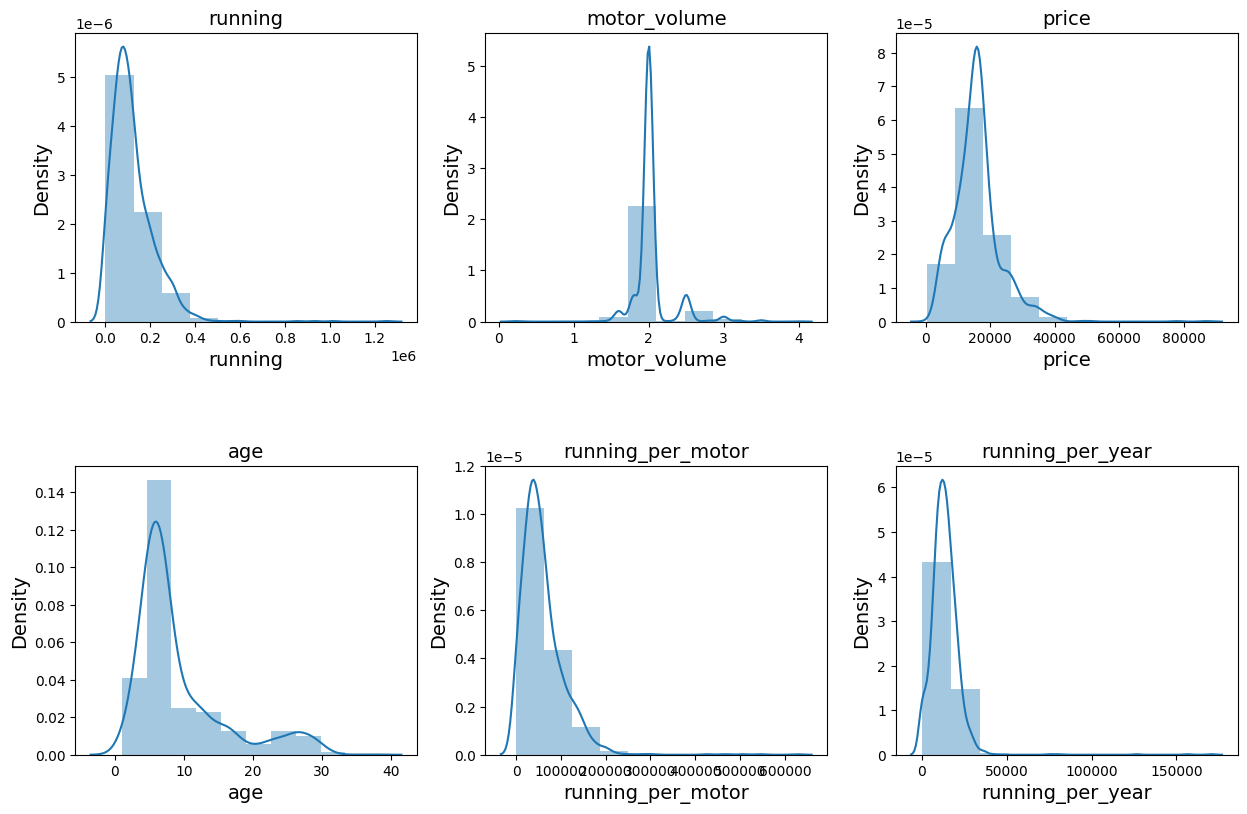

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(15, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    #assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

## Categorical column

number of category field:  5


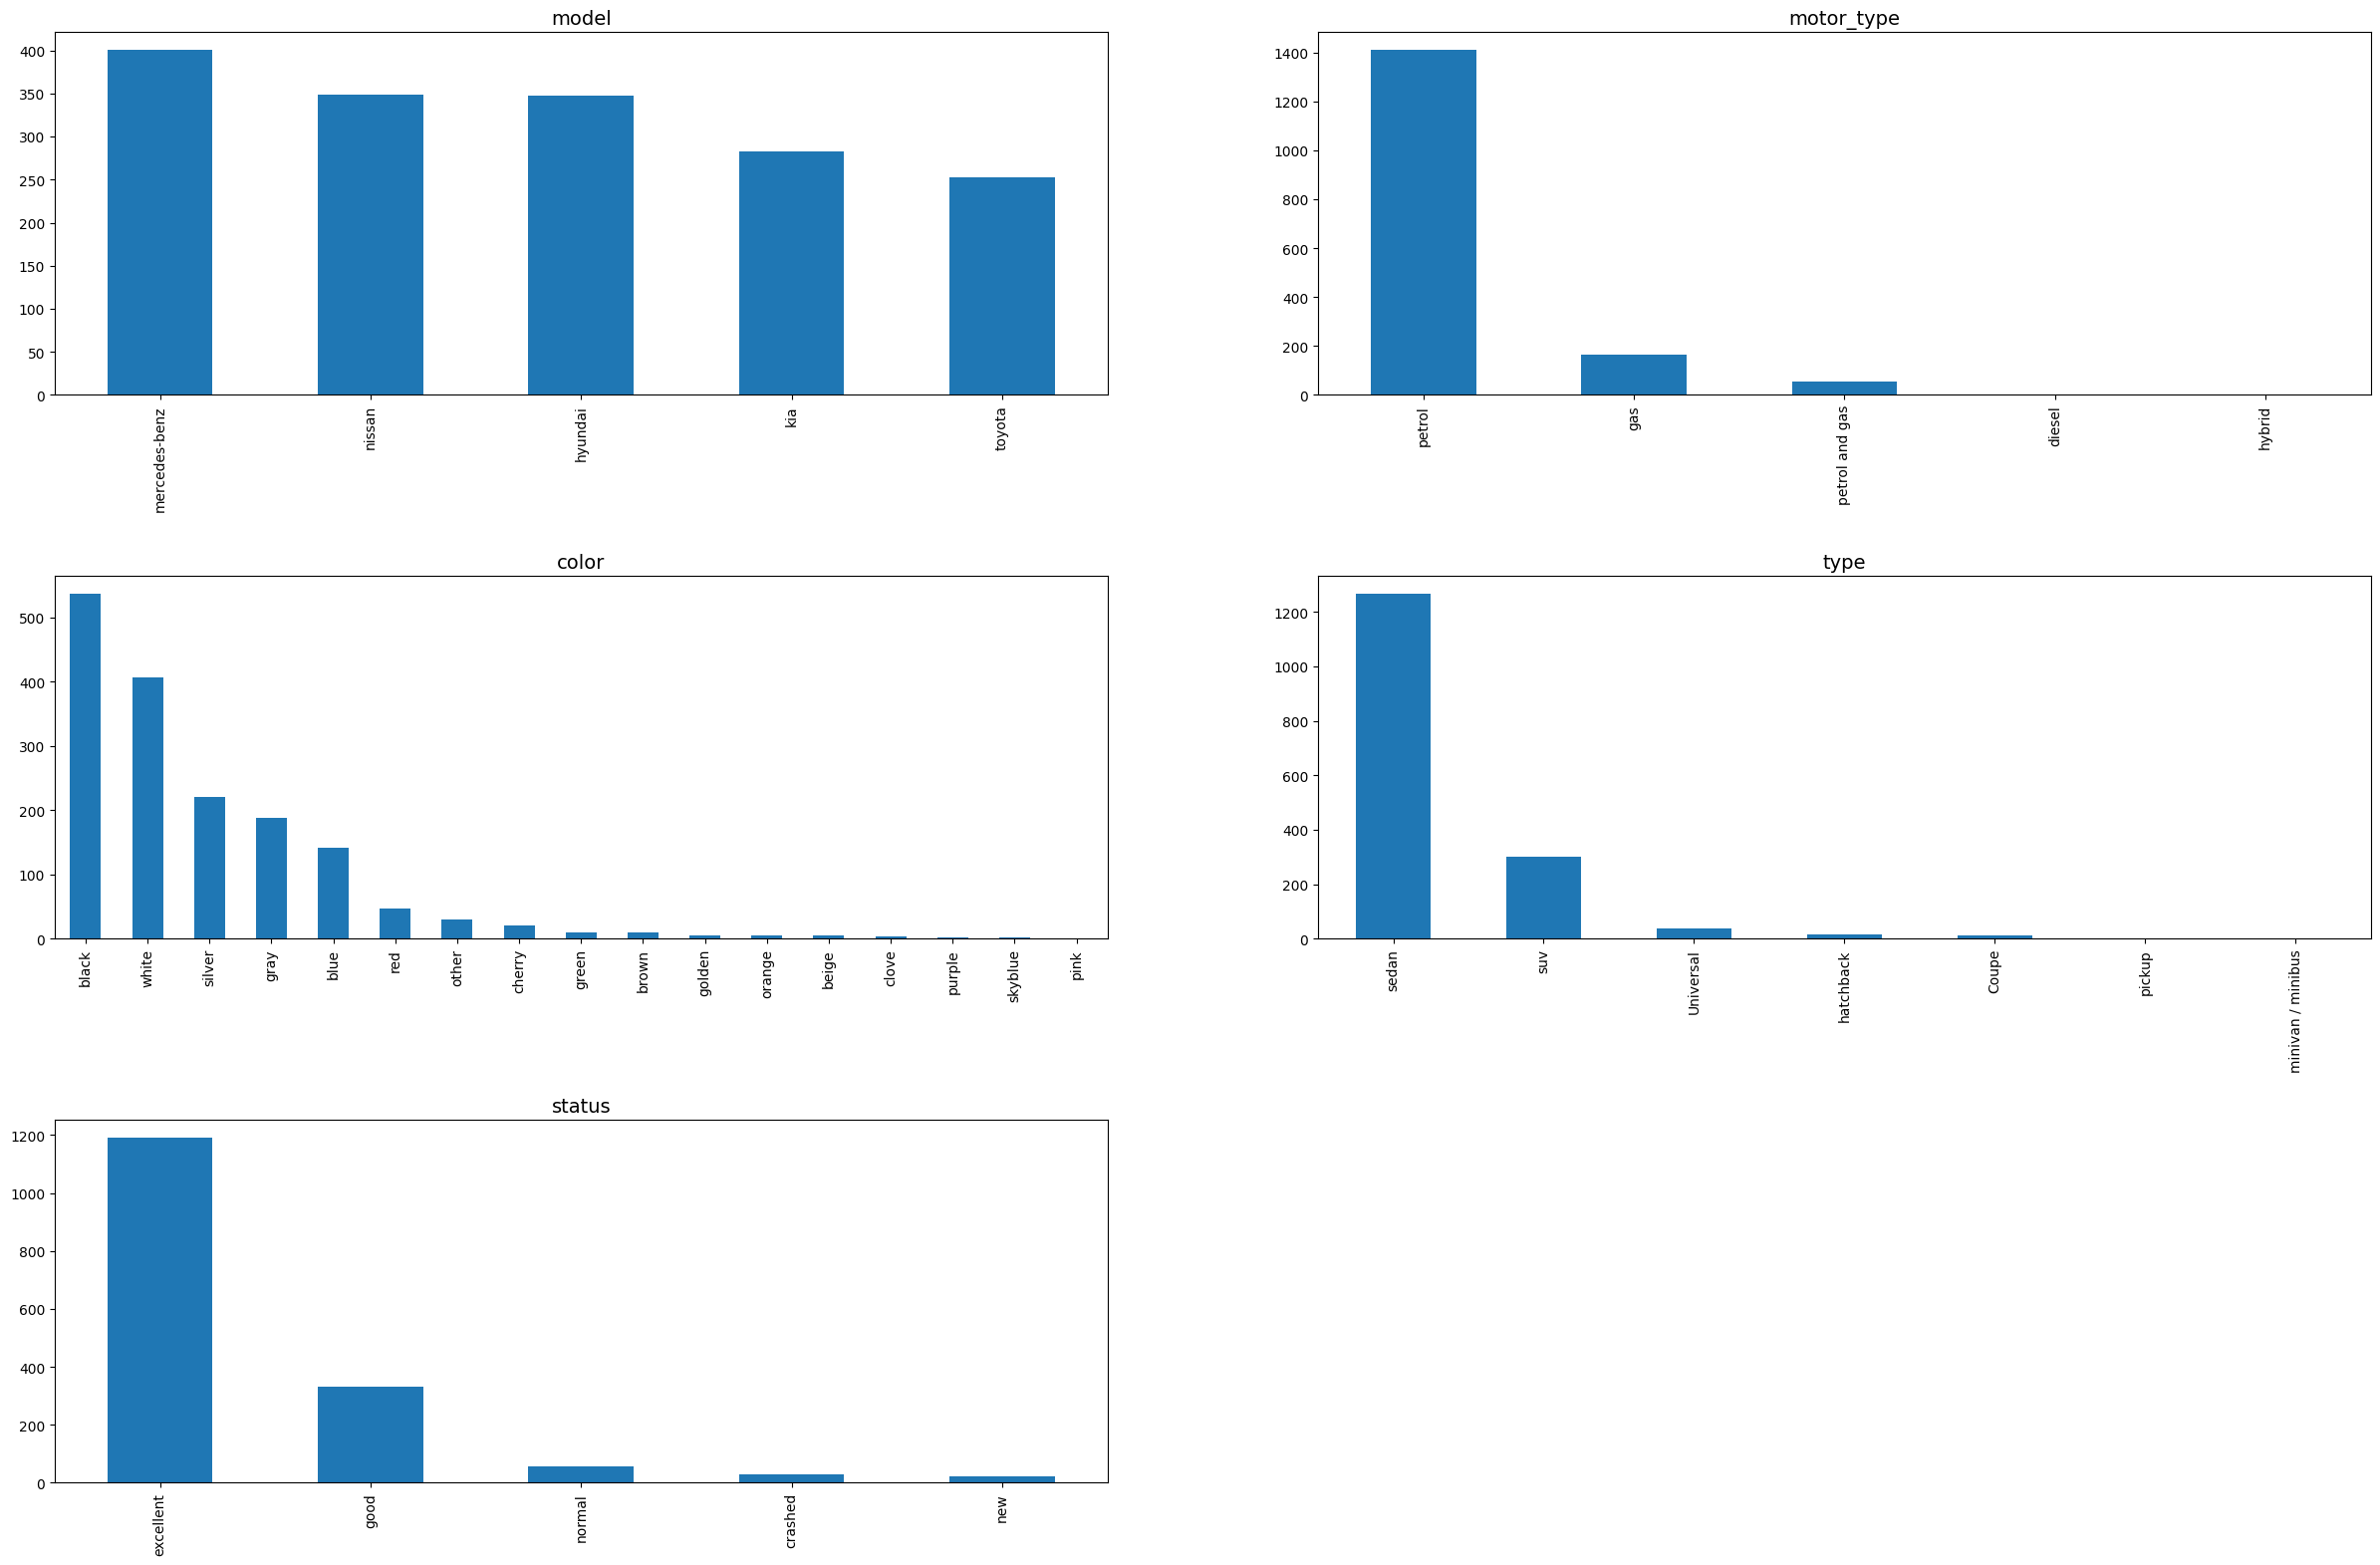

In [ ]:
# Category variable
cate_cols = df.select_dtypes('O').columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(df, cate_cols, row = 4, col = 2, figsize = (30, 26))

<Axes: xlabel='model', ylabel='price'>

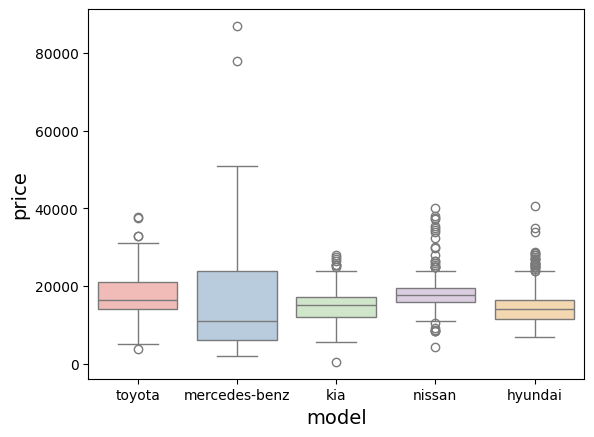

In [ ]:
sns.boxplot(x = 'model', y = 'price', data = df,palette='Pastel1')

<Axes: xlabel='motor_type', ylabel='price'>

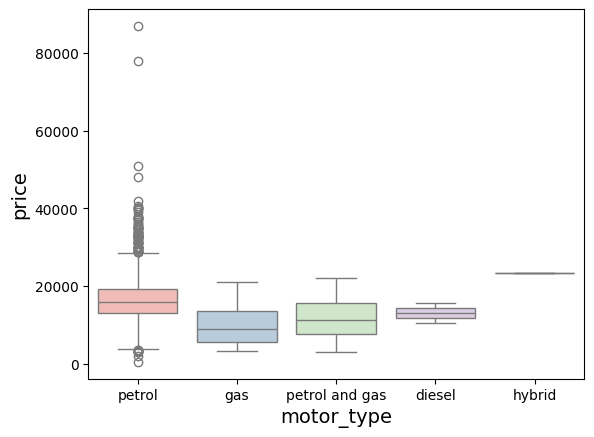

In [ ]:
sns.boxplot(x = 'motor_type', y = 'price', data = df,palette='Pastel1')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

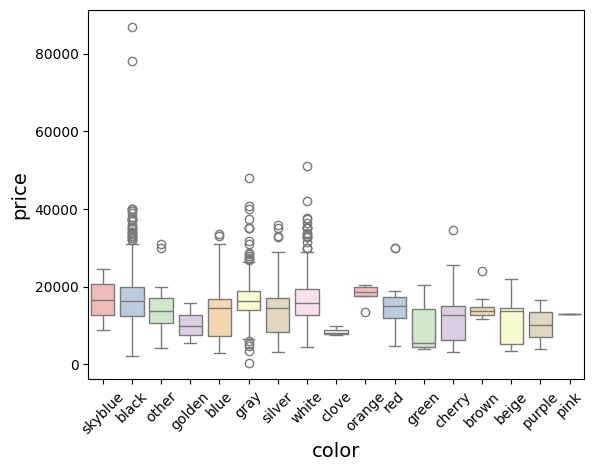

In [ ]:
ax = sns.boxplot(x = 'color', y = 'price', data = df,palette='Pastel1')
plt.setp(ax.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

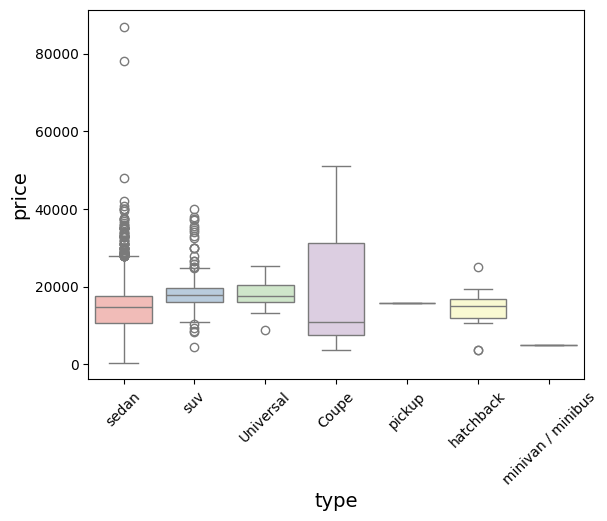

In [ ]:
ax = sns.boxplot(x = 'type', y = 'price', data = df,palette='Pastel1')
plt.setp(ax.get_xticklabels(), rotation=45)

<Axes: xlabel='status', ylabel='price'>

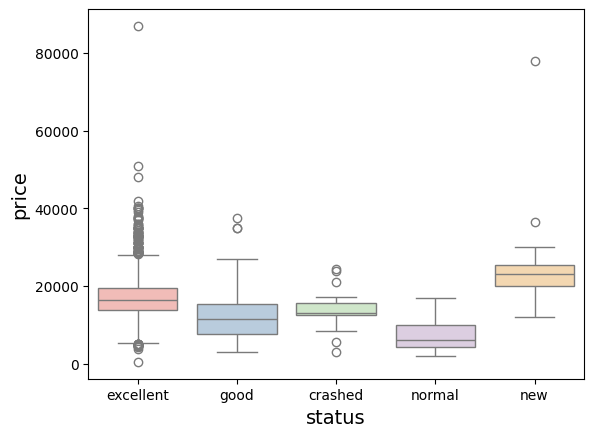

In [ ]:
sns.boxplot(x = 'status', y = 'price', data = df,palette='Pastel1')

## Corelation

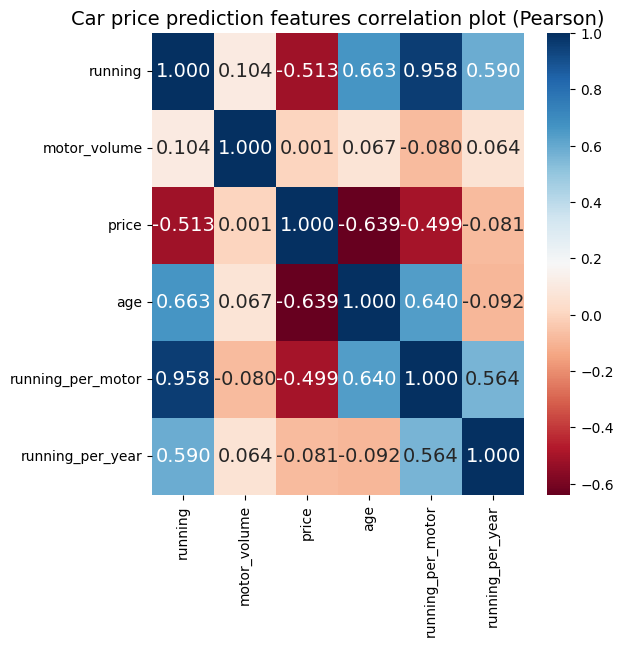

In [ ]:
plt.figure(figsize = (6,6))
plt.title('Car price prediction features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,fmt = '0.3f', annot=True,cmap="RdBu")
plt.show()

AgePrice has negative corelation because more recent the car is, higher the price is.

Price - Running has negative corelation which makes sense because more running car is, lower the price is.

Age - running_km as well a negative relationship which makes sense (i.e. older the vehicle the more the running_km)

Volume_motor has not much corelation on Price

# Prepare the data for the ML algorithms


## Somme tranformation for X_test

In [ ]:
# X_test
X_test['running'] = X_test['running'].apply(convert_to_km)
submission = pd.DataFrame({'Id': X_test['Id'].copy()})
X_test = X_test.drop(['wheel','Id'], axis=1)
X_test['age'] = 2024 - X_test['year']
X_test['running_per_motor'] = X_test['running'] / X_test['motor_volume']
X_test['running_per_year'] = X_test['running'] / (2024-X_test['year'])
X_test = X_test.drop(['year'], axis=1)

In [ ]:
X_test

,model,motor_type,running,color,type,status,motor_volume,age,running_per_motor,running_per_year
0,kia,petrol,24000.00,black,sedan,excellent,2.0,4,12000.000000,6000.000000
1,nissan,petrol,136793.90,white,suv,excellent,2.0,7,68396.950000,19541.985714
2,hyundai,petrol,48280.20,white,sedan,excellent,2.0,3,24140.100000,16093.400000
3,kia,petrol,85295.02,silver,sedan,excellent,2.0,6,42647.510000,14215.836667
4,mercedes-benz,petrol,230000.00,black,Universal,normal,1.8,21,127777.777778,10952.380952
...,...,...,...,...,...,...,...,...,...,...
406,nissan,petrol,33400.00,black,suv,excellent,2.0,3,16700.000000,11133.333333
407,hyundai,petrol,96560.40,other,sedan,excellent,2.0,7,48280.200000,13794.342857
408,mercedes-benz,petrol,218000.00,white,sedan,good,2.0,12,109000.000000,18166.666667
409,kia,petrol,64373.60,red,sedan,good,2.0,4,32186.800000,16093.400000


## Train set and valid set


In [ ]:
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

## Feature engineering

In [ ]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Liste of numerical and categorical data
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

# Preprocessing for categorical data
cat_pl= Pipeline(steps=[
    ('onehot', OneHotEncoder()) # Transform the values into OneHot vector
])

# Preprocessing for numerical data
num_pl = Pipeline(steps=[
    ('scaler', StandardScaler()) # Transform data by Standard
])

# Bundle preprocessing for numerical and categorical data
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names),
        ('cat', cat_pl, cat_names),
    ])

preprocessor_n = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names),
    ])

In [ ]:
#X_valid_prepared = preprocessor.fit_transform(X_valid)

# Select a model an train it


## Training and Evaluating on the Training Set

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessor_2, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['running', 'motor_volume',
                                                   'age', 'running_per_motor',
                                                   'running_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['model', 'motor_type',
                                                   'color', 'type',
                                                   'status'])])),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_predictions = lin_reg.predict(X_train)

lin_mae = mean_absolute_error(y_train, y_predictions)
lin_mse = mean_squared_error(y_train, y_predictions)
print(lin_mae,"\n",lin_mse)

2563.0489105874576 
 14671968.857399033


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessor_2, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['running', 'motor_volume',
                                                   'age', 'running_per_motor',
                                                   'running_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['model', 'motor_type',
                                                   'color', 'type',
                                                   'status'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
y_predictions = tree_reg.predict(X_train)

tree_mae = mean_absolute_error(y_train, y_predictions)
tree_mse = mean_squared_error(y_train, y_predictions)

print(tree_mae,"\n",tree_mse)

28.02450229709035 
 61026.0336906585


In [ ]:
from xgboost import XGBRegressor

xgb_reg = make_pipeline(preprocessor_2, XGBRegressor(random_state= 42,
          n_jobs = -1,))
xgb_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['running', 'motor_volume',
                                                   'age', 'running_per_motor',
                                                   'running_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['model', 'motor_type',
                                                   'color', 'type',
                                                   'status'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_predictions = xgb_reg.predict(X_train)

xgb_mae = mean_absolute_error(y_train, y_predictions)
xgb_mse = mean_squared_error(y_train, y_predictions)

print(xgb_mae,"\n",xgb_mse)

502.4851555583305 
 558503.9471292298


## Better Evaluation Using Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
lin_mae = -cross_val_score(lin_reg, X_train, y_train,
                              scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
pd.Series(lin_mae).describe()

count      19.000000
mean     2637.143134
std       158.342759
min      2379.158750
25%      2546.188697
50%      2591.874730
75%      2740.773411
max      2949.403452
dtype: float64

In [ ]:
tree_mae = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
pd.Series(tree_mae).describe()

count      19.000000
mean     2740.183327
std       270.827758
min      2234.838462
25%      2493.311538
50%      2830.253846
75%      2905.100264
max      3208.992366
dtype: float64

In [ ]:
forest_reg = make_pipeline(preprocessor_2,
                           RandomForestRegressor(random_state=42))
forest_mae = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
pd.Series(forest_mae).describe()

count      19.000000
mean     2142.875937
std       163.235282
min      1816.839434
25%      2037.673352
50%      2152.300804
75%      2221.342236
max      2452.454641
dtype: float64

In [ ]:
xgb_reg = make_pipeline(preprocessor_2,
                           XGBRegressor())
xgb_mae = -cross_val_score(xgb_reg, X_train, y_train,
                                scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
pd.Series(xgb_mae).describe()

count      19.000000
mean     2234.739258
std       135.995335
min      1964.688706
25%      2146.044135
50%      2264.437049
75%      2323.140134
max      2477.730613
dtype: float64

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

catb_reg = make_pipeline(preprocessor_2,
                         CatBoostRegressor(loss_function='MAE', silent = True))
catb_mae = -cross_val_score(catb_reg, X_train, y_train,
                                scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
pd.Series(catb_mae).describe()

count      19.000000
mean     1890.460789
std       156.823199
min      1542.657684
25%      1794.662483
50%      1871.499301
75%      2021.194285
max      2168.555112
dtype: float64

# Fine-tune your model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
"""X_train_prepared = preprocessor_2.fit_transform(X_train)
X_test_prepared = preprocessor_2.fit_transform(X_test)"""

'X_train_prepared = preprocessor_2.fit_transform(X_train)\nX_test_prepared = preprocessor_2.fit_transform(X_test)'

In [ ]:
"""model = CatBoostRegressor(loss_function='MAE', silent = True)
full_pipeline = Pipeline([
    ("preprocessing", preprocessor_n),
    ("model", CatBoostRegressor(loss_function='MAE', silent = True)),
])
param_grid = {'model__iterations': [200,250,300,350,400],
              'model__learning_rate': [0.1,0.5,1],
              'model__depth': [4, 6, 7,8],
              'model__l2_leaf_reg': [ 0,1e-4,0.1,1],
              }
"""

'model = CatBoostRegressor(loss_function=\'MAE\', silent = True)\nfull_pipeline = Pipeline([\n    ("preprocessing", preprocessor_n),\n    ("model", CatBoostRegressor(loss_function=\'MAE\', silent = True)),\n])\nparam_grid = {\'model__iterations\': [200,250,300,350,400],\n              \'model__learning_rate\': [0.1,0.5,1],\n              \'model__depth\': [4, 6, 7,8],\n              \'model__l2_leaf_reg\': [ 0,1e-4,0.1,1],\n              }\n'

In [ ]:
"""
# Create a GridSearchCV object
grid_catb = RandomizedSearchCV(
    estimator = full_pipeline ,
    param_distributions = param_grid,
    scoring = 'neg_mean_absolute_error',
    n_jobs = 4,
    verbose=0,
    cv = 3,
     )

grid_catb.fit(X_train,y_train,cat_features=['model','color','type','status','motor_type'])"""

"\n# Create a GridSearchCV object\ngrid_catb = RandomizedSearchCV(\n    estimator = full_pipeline ,\n    param_distributions = param_grid,\n    scoring = 'neg_mean_absolute_error',\n    n_jobs = 4,\n    verbose=0,\n    cv = 3,\n     )\n\ngrid_catb.fit(X_train,y_train,cat_features=['model','color','type','status','motor_type'])"

In [ ]:
model = CatBoostRegressor(loss_function='MAE', silent = True)


param_Xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
          }
param_grid_gb = {
    'iterations': [200,250,300,350,400],
    'learning_rate': [0.1,0.5,1],
    'depth': [4, 6, 7,8],
    'l2_leaf_reg': [ 0,1e-4,0.1,1],
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid = {'max_depth' : [2, 4, 8, 10, 12],
              'n_estimators' : [100, 200, 300],
              'max_features' : ['auto', 'sqrt'],
              "criterion" : ["friedman_mse", "mse", "mae"]}

# Create a GridSearchCV object
grid_gb = RandomizedSearchCV(
    estimator = model ,
    param_distributions = param_grid_gb,
    scoring = 'neg_mean_absolute_error',
    n_jobs = 4,
    verbose=0,
    cv = 3,
     )

grid_gb.fit(X,y,cat_features=['model','color','type','status','motor_type'])

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7a3045d66440>,
                   n_jobs=4,
                   param_distributions={'depth': [4, 6, 7, 8],
                                        'iterations': [200, 250, 300, 350, 400],
                                        'l2_leaf_reg': [0, 0.0001, 0.1, 1],
                                        'learning_rate': [0.1, 0.5, 1]},
                   scoring='neg_mean_absolute_error')

In [ ]:
print('Best parameters:', grid_gb.best_params_)
print('Best score:', grid_gb.best_score_)

Best parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 0, 'iterations': 300, 'depth': 7}
Best score: -2059.8557475222774


In [ ]:
y_pred = grid_gb.best_estimator_.predict(X_test)
submission['price'] = y_pred

In [ ]:
submission.to_csv('/content/gdrive/MyDrive/M2MIASHS/Mémoire S3/submission.csv',index=False)
print("Done")

Done


# Present your solution